In [2]:
%connect_info

{"key":"6c387fdb-3d6c-49ea-b416-05e0eed014b5","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9008,"control_port":9009,"shell_port":9010,"stdin_port":9011,"iopub_port":9012,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v35ff470ed5fdf7c760a9df29edc575467573dde7b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from copy import deepcopy


In [4]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import pywt
import pycwt

from hypyp.fnirs_tools import (
    xwt_coherence_morl,
    smoothing
)
import hypyp.plots
from hypyp.plots import (
    plot_spectrogram_periods,
    spectrogram_plot_period,
)

ninja: error: '/tmp/pip-build-env-tiw5qk87/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


Loading pywt from /home/patrice/work/ppsp/pywt/pywt


## Sine waves

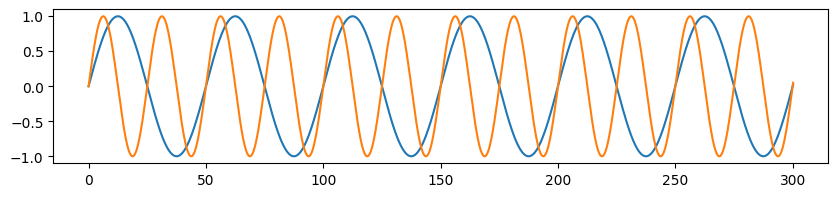

<Figure size 640x480 with 0 Axes>

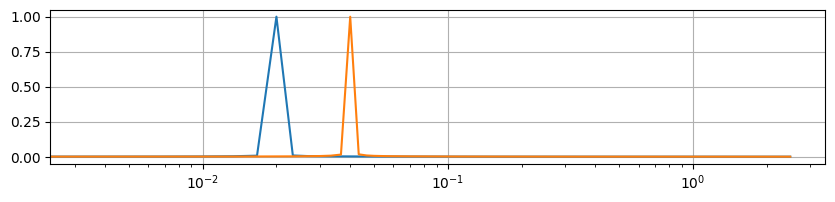

In [16]:
plt.figure(figsize=(10,2))

fs = 5
N = 1501
T = 1.0 / fs
x = np.linspace(0, N/fs, N)

freq1 = 0.02
freq2 = 0.04
#freq2 = 0.02 - 0.0001

y1 = np.sin(x * 2 * np.pi * freq1)
plt.plot(x, y1)

y2 = np.sin(x * 2 * np.pi * freq2)
#sig1_P2 = np.random.randn(*sig1_P2.shape) #np.finfo(float).eps*np.ones(*sig1_P2.shape) 
plt.plot(x, y2)

plt.figure()

plt.figure(figsize=(10,2))
# sample spacing
yf = fft.fft(y1)
xf = fft.fftfreq(N, T)[:N//2]
yf2 = fft.fft(y2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]))
plt.xscale('log')
plt.grid()
plt.show()

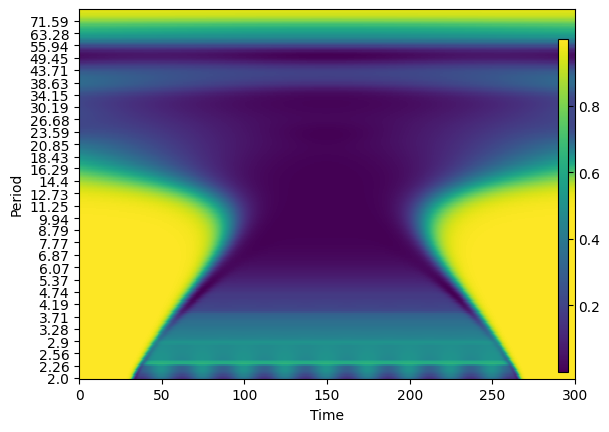

In [17]:
tracer = dict(name='pywt')
wct, times, fq, coif = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name='cmor2-1',
    normalize=True,
    smoothing_params=dict(smooth_factor=-0.1),
    tracer=tracer
)

#hypyp.plots.plot_line([tracer], 'smoothing_k', 'smoothing_k') 
#plt.pcolormesh(np.abs(tracer['W1']))
#plt.pcolormesh(np.imag(tracer['smoothing_W_fft']))
#plt.show()
#plt.plot(tracer['smoothing_gaus_fft'][:,2])
#plt.show()

#lists for df
#hypyp.plots.plot_coefs([tracer], 'S1', 'S1')
#hypyp.plots.plot_coefs([tracer], 'S2', 'S2')
#hypyp.plots.plot_coefs([tracer], 'W12', 'W12')
spectrogram_plot_period(np.abs(wct), times, fq, coif)
plt.show()



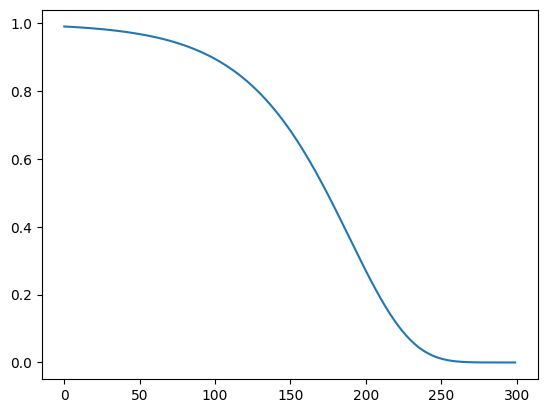

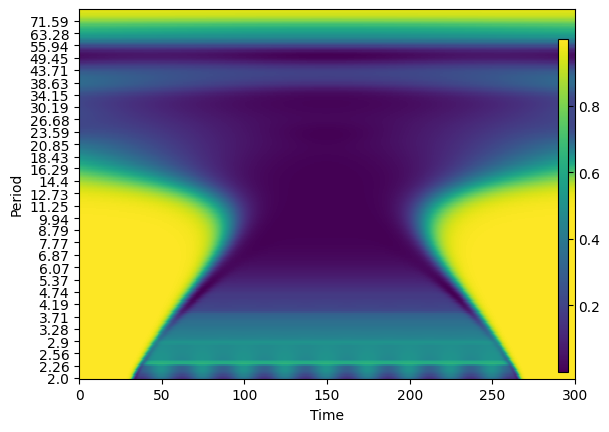

In [18]:
plt.plot(tracer['smoothing_gaus_fft'][:,2])
plt.show()

#lists for df
#hypyp.plots.plot_coefs([tracer], 'S1', 'S1')
#hypyp.plots.plot_coefs([tracer], 'S2', 'S2')
#hypyp.plots.plot_coefs([tracer], 'W12', 'W12')
spectrogram_plot_period(np.abs(wct), times, fq, coif)
plt.show()



In [8]:


plt.plot(np.real(tracer['int_psi']))
plt.plot(np.imag(tracer['int_psi']))
plt.plot(np.abs(tracer['int_psi']))
plt.legend(['real', 'imag', 'magnitude'])
plt.title('mother wavelet')
plt.show()



KeyError: 'int_psi'

In [9]:


for i in list(range(0, 20)) + [-1]:
    plt.plot(np.real(tracer['int_psi_scales'][i]))
    #if i != -1:
    #    plt.scatter(np.arange(0, len(tracer['int_psi_scales'][i])), np.real(tracer['int_psi_scales'][i]))
    plt.plot(np.imag(tracer['int_psi_scales'][i]))
    #if i != -1:
    #    plt.scatter(np.arange(0, len(tracer['int_psi_scales'][i])), np.imag(tracer['int_psi_scales'][i]))
    plt.plot(np.abs(tracer['int_psi_scales'][i]))
    plt.legend(['real', 'real points', 'imag', 'imag points', 'magnitude'])
    plt.title(f"daughter wavelet for scale {i}")
    plt.show()



KeyError: 'int_psi_scales'

In [10]:


# number of points per wavelet
j_sizes = [len(tracer['js'][i]) for i in np.arange(len(tracer['js']))]
plt.plot(j_sizes)
plt.title(f"Number of points per wavelet")
plt.show()


KeyError: 'js'

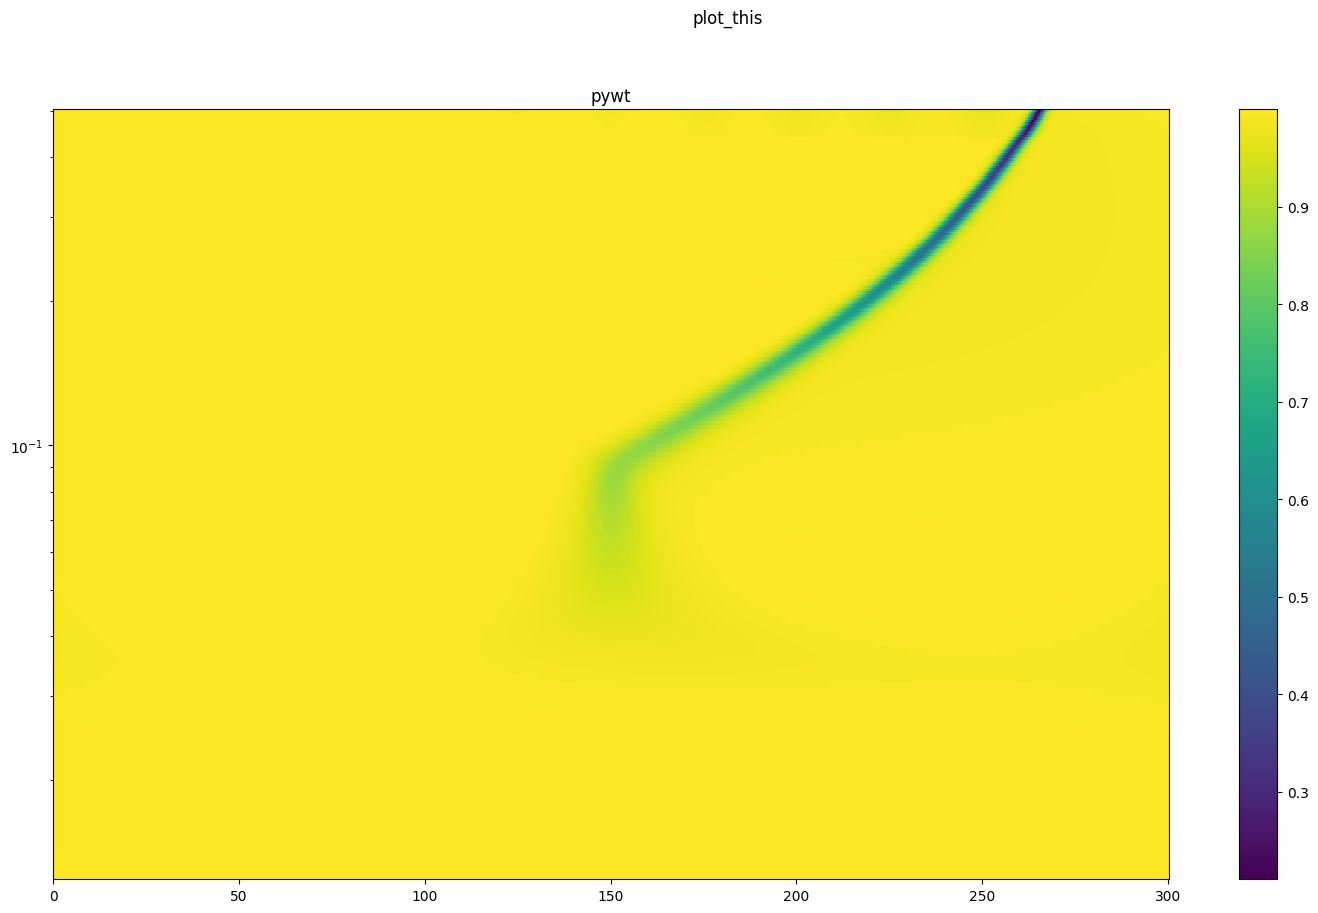

In [11]:
tracer['plot_this'] = tracer['S12'] ** 2 / (tracer['S1'] * tracer['S2'])
hypyp.plots.plot_coefs([tracer], 'plot_this', 'plot_this') 


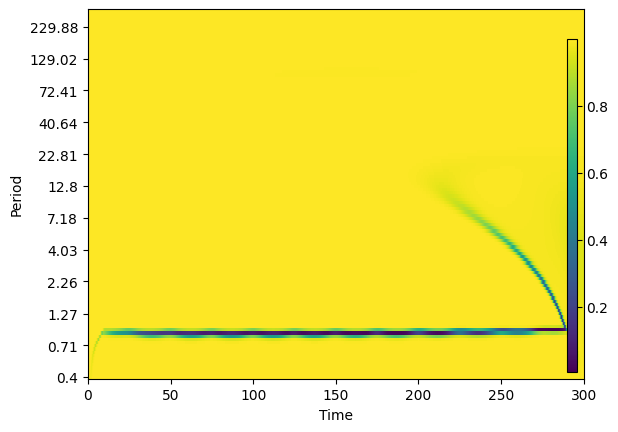

KeyError: 'x1'

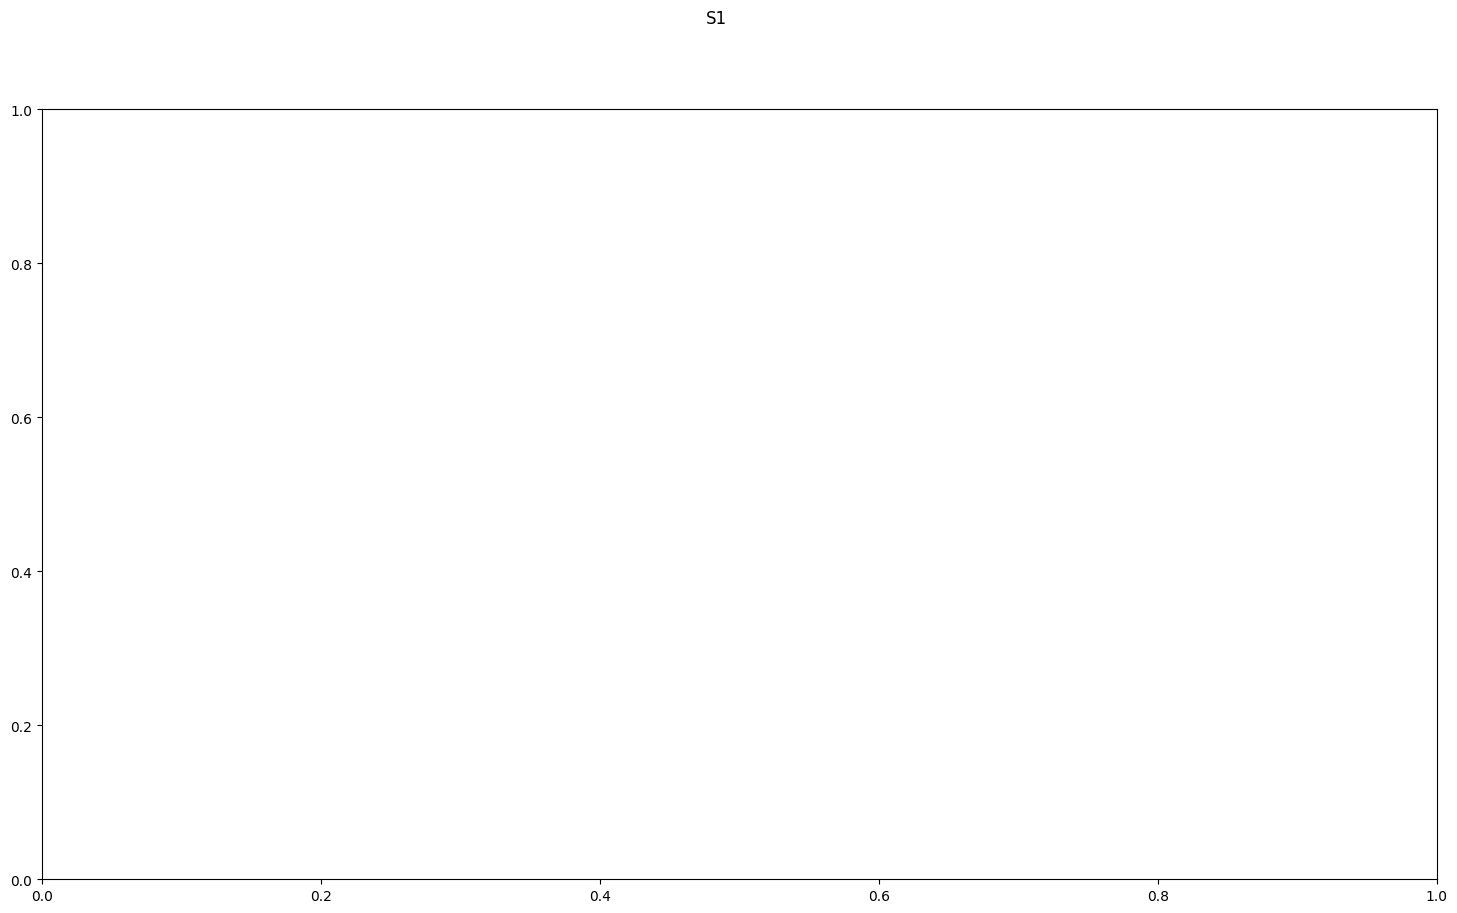

In [13]:
tracer_pywt = dict(name='pywt')
wct, times, fq, coif = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name='cmor2-1',
    normalize=True,
    smoothing_params=dict(smooth_factor=-0.1),
    tracer=tracer_pywt
)

tracer_pycwt = dict(name='pycwt')
wct_pycwt, aWCT_pycwt, coi_pycwt, freqs_pycwt, significance_pycwt = pycwt.wct(y1, y2, dt=1/fs, sig=False, tracer=tracer_pycwt)

tracers = [tracer_pywt, tracer_pycwt]

spectrogram_plot_period(np.abs(wct_pycwt), times, freqs_pycwt, coif)

#hypyp.plots.plot_coefs(tracers, 'W1', 'W1')
plt.show()



hypyp.plots.plot_coefs([tracer_pycwt], 'S1', 'S1')

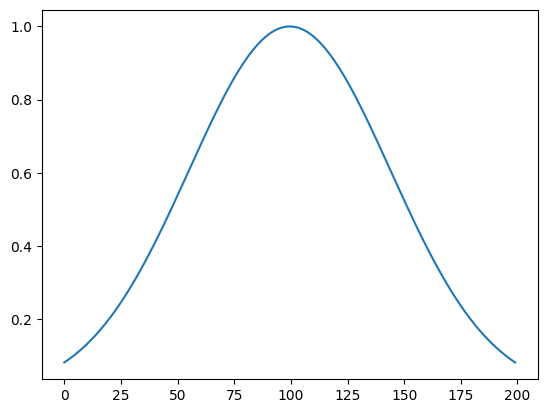

In [180]:
x = np.linspace(-5, 5, 200)
plt.plot(np.exp(-x **2 / 10))
